In [1]:
import MDAnalysis
from MDAnalysis.analysis.waterdynamics import SurvivalProbability as SP
import matplotlib.pyplot as plt



/home/rajarshi/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/hbonds/hbond_autocorrel.py:52: DeprecationWarning: This module was moved to MDAnalysis.analysis.hydrogenbonds.hbond_autocorrel; hbonds.hbond_autocorrel will be removed in 3.0.0.
  warnings.warn(wmsg, category=DeprecationWarning)


In [ ]:
##sp-wt

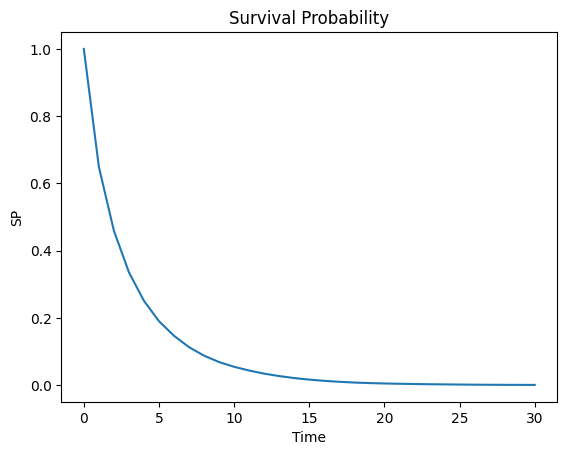

In [4]:
u = MDAnalysis.Universe('../../../../../../../media/rajarshi/Levinthal/water-role/free-pep/wt/aq/first-frame.gro', '../../../../../../../media/rajarshi/Levinthal/water-role/free-pep/wt/aq/trajectory_0-1000ns_nopbc.xtc')
select = "byres name OH2 and sphzone 12.5 (protein) "
sp = SP(u, select, verbose=True)
sp.run(start=0, stop=101, tau_max=30)
tau_timeseries = sp.tau_timeseries
sp_timeseries = sp.sp_timeseries

output_file_path = "wt_sp.dat"  # You can change the file name and path
with open(output_file_path, 'w') as output_file:
    for tau, sp in zip(tau_timeseries, sp_timeseries):
        output_file.write("{time} {sp}\n".format(time=tau, sp=sp))
        
# plot
plt.xlabel('Time')
plt.ylabel('SP')
plt.title('Survival Probability')
plt.plot(tau_timeseries, sp_timeseries)
plt.show()